In [1]:
import scanpy as sc
import scCNA as cna
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

adata = sc.read_h5ad(r"C:\Users\LENOVO\Documents\pyfiles_cscb_fin\sliced_data\GSE216481\adata_part1.h5ad")


In [2]:
import gzip
import shutil

input_path = r"C:\Users\LENOVO\Documents\pyfiles_cscb_fin\gtffile\Homo_sapiens.GRCh38.113.gtf.gz"
output_path = r"C:\Users\LENOVO\Documents\pyfiles_cscb_fin\gtffile\Homo_sapiens.GRCh38.113.gtf"

with gzip.open(input_path, 'rb') as f_in:
    with open(output_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("unzip accomplished")


unzip accomplished


In [3]:
gtf_file = r"C:\Users\LENOVO\Documents\pyfiles_cscb_fin\gtffile\Homo_sapiens.GRCh38.113.gtf"
adata = cna.utils.annotate_gene_position(adata, gtf_file)

d:\anaconda3\envs\scCNA_env\lib\site-packages\scCNA\utils.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gtf = pd.read_csv(gtf_file,sep="\t",comment="#", header=None,


In [4]:
adata = cna.utils.sort_genes_by_location(adata)

In [6]:
chrom_counts = adata.var["chromosome"].value_counts(dropna=False)
print(chrom_counts)


chromosome
NaN    5457
1      1787
2      1213
19     1186
3      1060
17     1030
11     1007
12      934
6       908
5       857
7       773
16      771
4       711
10      700
9       673
X       666
14      590
15      564
20      489
8       443
13      366
18      262
22      431
21      126
Y        17
MT       13
Name: count, dtype: int64


In [8]:
print(adata.var[['chromosome', 'start', 'end']].head())

          chromosome     start       end
LINC00115          1  586945.0  827989.0
FAM87B             1  817363.0  819842.0
FAM41C             1  868052.0  877032.0
SAMD11             1  923923.0  944575.0
NOC2L              1  944203.0  959309.0


In [9]:
print(adata.var_names[:10])

Index(['LINC00115', 'FAM87B', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'PERM1', 'HES4', 'ISG15'],
      dtype='object')


In [ ]:
adata.obs['cell_type'].value_counts()

cell_type
Neural             1711
Endothelial        1314
Mesenchymal        1086
Intestinal          959
Lung (Ciliated)     918
Trophoblast         902
Cardiomyocyte       849
Pluripotent         824
Name: count, dtype: int64

In [11]:
import importlib
import scCNA
importlib.reload(scCNA)


<module 'scCNA' from 'd:\\anaconda3\\envs\\scCNA_env\\lib\\site-packages\\scCNA\\__init__.py'>

In [12]:
from scipy.sparse import csr_matrix
adata.X=csr_matrix(adata.X)
#adata.write_h5ad('task3.h5ad')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24760\1775245722.py:2: UserWarning: Trying to set a dense array with a sparse array on a view.Densifying the sparse array.This may incur excessive memory usage
  adata.X=csr_matrix(adata.X)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24760\1775245722.py:2: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  adata.X=csr_matrix(adata.X)


In [13]:
ad_def = scCNA.find_cnas(
    adata.copy(),
    reference_key='cell_type',
    reference_cat=[
        'Neural',
        'Endothelial',
        'Mesenchymal',
        'Intestinal',
        'Lung (Ciliated)',
        'Trophoblast',
        'Cardiomyocyte',
        'Pluripotent'
    ],
    threshold=5,
    min_cells=20,
    window_size=100
)


converting to sparse matrix...


d:\anaconda3\envs\scCNA_env\lib\site-packages\scanpy\preprocessing\_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\anaconda3\envs\scCNA_env\lib\site-packages\scanpy\preprocessing\_normalization.py:243: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


d:\anaconda3\envs\scCNA_env\lib\site-packages\scanpy\preprocessing\_simple.py:387: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 87)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 60)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 57)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 73)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 73)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 100)
(1, 10

In [14]:
print(ad_def.shape)

(14259, 17909)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def simplify_cna_label(x):
    if isinstance(x, str):
        if 'gain' in x:
            return 'gain'
        elif 'loss' in x:
            return 'loss'
        else:
            return 'none'
    return 'none'

ad_def.obs['cna_type_simplified'] = ad_def.obs['detect_CNA'].apply(simplify_cna_label)


cna_summary = ad_def.obs.groupby(['cell_type', 'cna_type_simplified']).size().unstack(fill_value=0)

cna_summary['Total'] = cna_summary.sum(axis=1)
cna_summary['% CNA+'] = 100 * (cna_summary.get('gain', 0) + cna_summary.get('loss', 0)) / cna_summary['Total']

print(cna_summary)

cna_type_simplified  gain  loss  none  Total     % CNA+
cell_type                                              
Cardiomyocyte           0   672   177    849  79.151943
Endothelial             0   864   450   1314  65.753425
Intestinal              0     0   959    959   0.000000
Lung (Ciliated)        41   160   717    918  21.895425
Mesenchymal             0   490   596   1086  45.119705
Neural                  0  1071   640   1711  62.594974
Pluripotent             0   285   539    824  34.587379
Trophoblast             0   767   135    902  85.033259


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24760\1074829750.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cna_summary = ad_def.obs.groupby(['cell_type', 'cna_type_simplified']).size().unstack(fill_value=0)


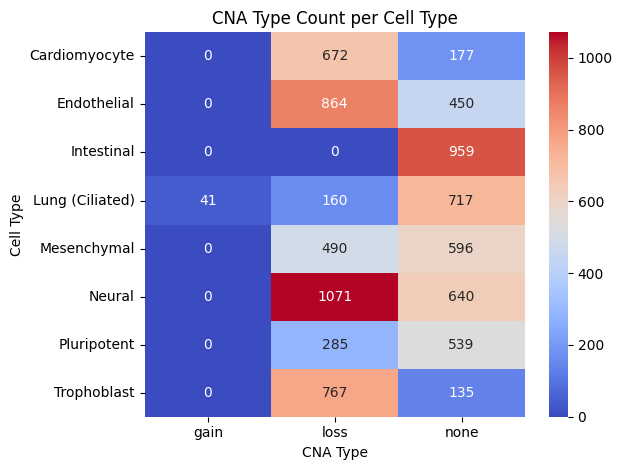

In [ ]:
plot_data = cna_summary[['gain', 'loss', 'none']]
sns.heatmap(plot_data.astype(int), annot=True, fmt='d', cmap='coolwarm')
plt.title("CNA Type Count per Cell Type")
plt.xlabel("CNA Type")
plt.ylabel("Cell Type")
plt.tight_layout()
plt.show()
